# Support Vector Machines

Ce chapitre explique les concepts centraux des SVM, comment les utiliser et comment elles fonctionnent.

## Setup

In [1]:
#python >= 3.5 nécessaire
import sys
assert sys.version_info >= (3, 5)

#scikit-learn >= 0.20 nécessaire
import sklearn
assert sklearn.__version__ >= "0.20"

# Autres imports
import numpy as np
import os

# pour rendre les output stables au fil des runs
np.random.seed(42)

# pour tracer de jolis graphes
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# où sauvegarder les figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Classification SVM linéaire

### Large Margin Classification

L'idée fondamentale derrière les SVM est mieux expliquée avec des images (on s'intéressera au code plus tard) :

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # longueur et largeur des pétales
y = iris["target"]

X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
setosa_or_versicolor = (y == 0) | (y == 1) # Rappel, il s'agit des valeurs dans target qui correspondent à stosa et verticolor
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [5]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [6]:
len(X)

100

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# Modèle de classification SVM

# ça prend des siècles à faire tourner, ne pas le faire.
#svm_clf = SVC(kernel="linear", C=float("inf"))
#svm_clf.fit(X, y)

NameError: name 'svm_clf' is not defined

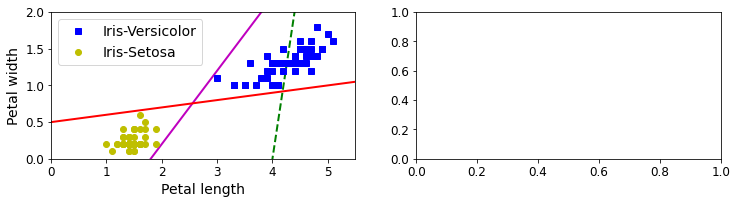

In [8]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Ces figures montrent une partie du dataset de l'iris. Les deux classes peuvent clairement être séparées facilement avec une ligne droite (elles sont *séparables linéairement*). Le graphe de gauche montre des limites de décisions de trois classificateurs linéaires possibles.

 Le modèle dont la limite de décision est représenté par la ligne en pointillé est tellement mauvais qu'il ne sépare pas les classes correctement. Les deux autres modèles fonctionnent parfaitement sur le JdE mais leurs limites de décisions sont tellement proches des instances que ces modèles n'auront probablement pas de bonnes performances sur de nouvelles instances.

 Au contraire, la ligne pleine dans le graphe de droite représente la limite de décision d'un classificateur SVM ; cette ligne sépare non seulement les deux classes, mais resté également le plus loin possible des plus proches instances d'entraînement.

 On peut imaginer un classificateur SVM comme la rue la plus large possible (représentée par les lignes en pointillés) entre les classes. C'est ce qu'on appelle la *large margin classification* (classfication à grande marge).

 À noter qu'ajouter plus d'instances d'entraîenement "hors de la rue" n'affectera pas la limite de décision du tout : elle est entièrement déterminée (ou "supportée") par les instances localisées sur les bords de la route. Ces instances sont appelés des vecteurs supports (*support vector*) et sont entourées dans le graphe.

Saving figure sensitivity_to_feature_scales_plot


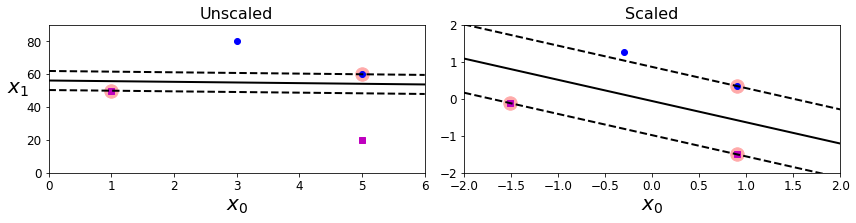

In [9]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

*Attention* : Les SVM sont sensibles à l'échelles des features, comme on peut le voir ici : dans le graphe de gauche, l'échelle verticlae est beaucoup plus large que l'horizontale, donc la rue la plus large possible  est proche de l'horizontal. Après une mise à l'échelle en utilisant `StandardScale` de sklearn, la limite de décision dans le graphe de droite apparait bien meilleure.

### Soft Margin Classification

Si impose strictement que toutes les instances doivent être hors de la route et sir le côté droit, c'est ce qu'on appelle une *hard margin classification*. Il y a deux problèmes principaux avec la hard margin classification. D'abord, elle ne marche que si les données sont linéairement séparables. Ensuite, elle est sensible aux outliers.

Saving figure sensitivity_to_outliers_plot


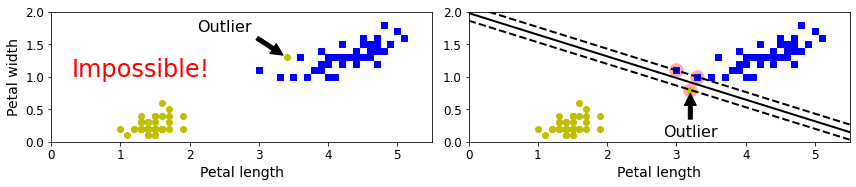

In [10]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

On peut voir ici que le dataset de l'iris avec seulement un seul outlier : sur la gauche, il est impossible de trouver une hard margin ; sur la droite, la limite de décision finit dans une zone très différente de celle qu'on a pu voir dans la première figure sans outlier, et la généralisation ne va probablement pas bien se faire non plus.

Pour éviter ces problèmes, on peut utiliser un modèle plus fexible. L'objectif est de trouver un bonne balance entre garder la rue la plus large possible et limite les dépassement sur la marge *margin violations* (cad quand les instances se retrouvent au milieu de la rue ou carrément de l'autre côté). C'est ce qu'on appelle la *soft margin classification*.

Quand on crée un modèle SVM en utilisant sklearn, on peut spécifier le nombre d'hyperparamètres. `C` est l'un d'entre eux. Si on le défini à une valeur très faible, alors on va terminer avec un modèle comme le graphe de gauche sur la figure ci dessous. Avec une valeur élevée, on obtient le modèle sur la droite. Les dépassements de marge sont mauvais. C'est normalement mieux d'avoir beaucoup moins d'entre eux. Cependant, dans ce cas, le modèle sur la gauche a beaucoup plus de dépassements, mais va probablement mieux généraliser.

*Attention* : Si notre modèle SVM overfit, on peut essayer de régulariser en réduisant `C`.

Le code suivant charge les données du dataset de l'iris, met les features à l'échelle, et ensuite entraîne un modèle SVM linéaire (en utilisant la classe `LinearSVC` avec `C=1` et la fonction *hinge loss*) pour détecter les fleurs *Iris virginica*.

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

Le modèle qui en résulte est le graphe de gauche dans la prochaine figure.

Ensuite, on peut comme d'habitude utiliser le modèle pour faire des prédictions :

In [14]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

*Remarque* : Contrairement aux classificateurs de Régression Logisitque, les classificateurs SVM n'output pas de probabilités pour chaque classe.

On va maintenant générer le graphe dont on parle :

In [15]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/home/remycosta/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [16]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


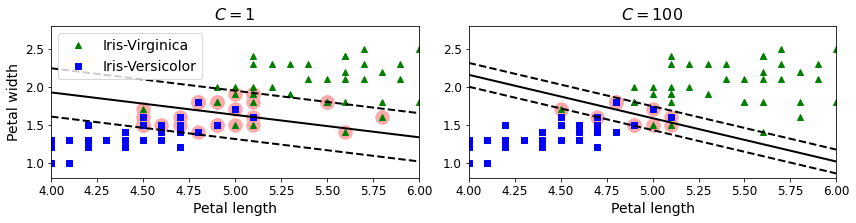

In [17]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

save_fig("regularization_plot")

Au lieu d'utiliser une classe `LinearSVC`, on peut utliser une classe `SVC` avec un kernel linéaire. Quand on crée un modèle SVC, on pourrait écrire `SVC(kernel="linear", C=1)`. Ou on peut utiliser la classe `SGDClassifier`, avec `SGDClassifier(loss="hinge", alpha=1/(m*C))`. Cela applique une SGD pour entraîner un classificateur SVM. Ça ne converge pas aussi vite que la classe `LinearSVC`, mais ça peut être utile pour prendre en charge des tâches de classification online ou des énormes datasets qui ne rentrent pas en émoire (out-of-core training).

*Remarque* : La classe `LinearSVC` régularise le terme de biais, donc on devrait se concentrer sur le JdE en premier en soustrayant sa moyenne. C'est automatique si on met à l'echelles les données en utilisant `StandardScaler`. Il faut également s'assurer qu'on règle l'hyperparamètre `loss` à `"hinge"`, car ce n'est pas la valeur par défaut. Enfin, pour de meilleures performances, on devrait régler l'hyperparamètre `dual` à `False`, à moins qu'il n'y ait d'autres features que les instances d'entraînement (dont on va discuter un peu plus tard).

## Classification SVM non-linéaire (*Nonlinear SVM Classification*)

Même si les classificateurs SVM linéaires sont efficaces et marchent suprenament bien dans de nombreux cas, beaucoup de datasets ne sont même pas proches d'être séparables linéairement.

Une approche pour rendre en charge les datasets non-linéaires est d'ajouter plus de features, comme des features polynomiales ; dans certains cas, cela peut résulter en un dataset linéairement séparable.

Regardons la figure ci dessous : le graphe de gauche représente un somple jeu de données avec une seule feature, $x_1$. Ce dataset n'est pas séparable linéairement. Mais si on lui ajoute une deuxième feature $x_2 = (x_1)^2$, le dataset en 2D résultant est parfaitement séparable linéairement.

Saving figure higher_dimensions_plot


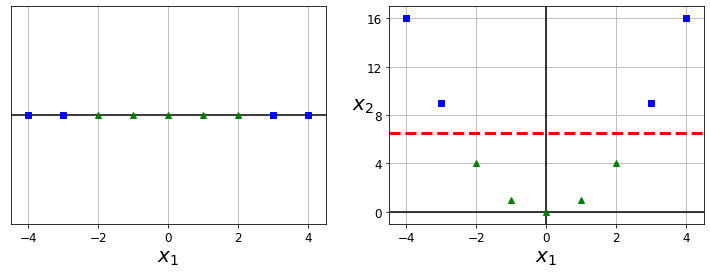

In [18]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()


Pour implémenter cette idée en utilisant sklearn, on peut créer un `Pipeline` contenant un transformateur `PolynomialFeatures`, suivi d'un `StandardScaler` et d'un `LinearSVC`. Essayons cela sur le dataset des lunes : c'est un dataset de jeu pour la classification binaire dans lequel les points de données sont en forme de deux demi-cercles entrelacés. On peut générer ce dataset en utilisant la fonction `make_moons()` :

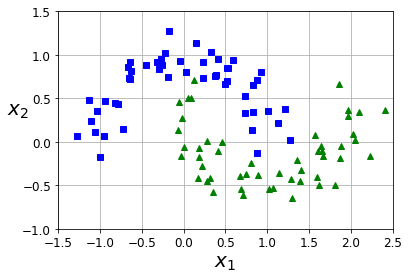

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [23]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svc_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svc_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

Saving figure moons_polynomial_svc_plot


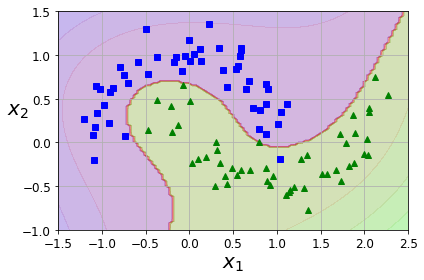

In [24]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svc_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

### Polynomial Kernel

Ajouter une feature polynomiale est simple à implémenter et peut très bien marcher avec toutes sortes d'algo ML (et pas juste les SVM). Ceci étant posé, à un faible degré polynomial, cette méthode ne peut pas gérer des datasets très complexes, et avec un haut degré polynomial, cela crée un énorme nombre de features, rendant le modèle trop lent.

Heureusement, quand on utilise des SVM, on peut utiliser une technique mathématique miraculeuse appelée le *kernel trick*. Le *kernel trick* rend possible l'obtention du même résultat que si on avait ajouté de nombres features polunomiales, même avec de très haut degrés polynomiaux, sans vraiment avoir à les ajouter.

Cette astuce peut être implémentée par la classe `SVC`. Essayons cela sur les dataset des lunes :

In [25]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

Ce code entraîne un classificateur SVM en utilisant un kernel polynomial de troisème degré. On peut le voir sur la figure ci-dessous sur le graphe de gauche. Sur la droite, un autre classificateur SVM utilisant un kernel polynomial de 10ème degré. Évidemment, si le modèle overfit, on va vouloir réduire le degré polynomial. Inversement, s'il underfit, on va vouloir l'augmenter. L'hyperparamètre `coef0` contrôle à combien le modèle est influencé par un haut degré polynomial contre un faible degré.

Saving figure moons_kernelized_polynomial_svc_plot


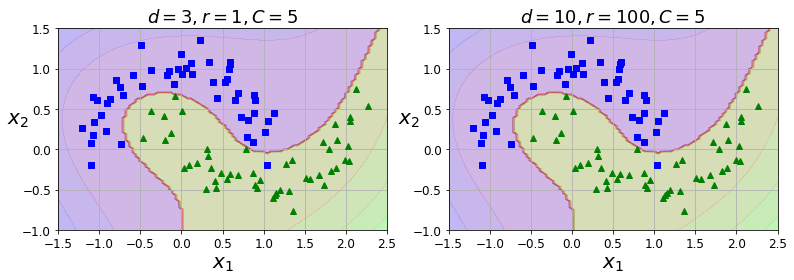

In [27]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

*Remarque* : Une approche courante  pour trouver les bonnes valeurs des hyperparamètres est d'utiliser la *grid search*. Il est souvent plus rapide de fe dabord faire une très grossière grid search, puis d'affiner autour des meilleurs valeurs trouvées. Avoir une bonne idée de ce que fait réellement chaque hyperparamètre peut également vous aider à rechercher dans la bonne partie de l'espace des hyperparamètres.

### Similarité de features

Une autre technique pour régler les problèmes non-linéaires est d'ajouter des features calculées en utilsant une *fonction de similarité*, qui mesure combien chaque instance va ressemble à un *repère* (*landmark*) particulier.

Par exemple, prenons le dataset 1D dont on a parlé précédemment, et ajoutons lui deux repères à $x_1 = -2$ et $x_1 = 1$ (voir figure suivante). Ensuite, définissons la fonction de similarité pour être la fonction de base radiale gaussienne (Gaussian RBF) avec $\gamma=3$

*Gaussian RBF*
$$
\phi_\gamma(\text{x}, l) = \exp\left(-\gamma||\text{x}-l||^2\right)
$$

C'est une fonction en forme de cloche qui varie de 0 (très loin du repère) à 1 (le repère). 

Maintenant, nous sommes prêts à calculer les nouvelles caractéristiques. Par exemple, regardons l'instance $x_1=-1$ :  elle se situe à une distance de 1 du premier repère, et 2 du second repère. Donc ses nouvelles features sont $x_2 = \exp(-0.3*1²) \approx 0.74$ et $x_3 = \exp(-0.3x2^2) \approx 0.30$. Le graphe de droite montre le dataset transformé (lâchant la feature de départ). Comme on peut le voir, c'est maintenant séparable linéairement.

Saving figure kernel_method_plot


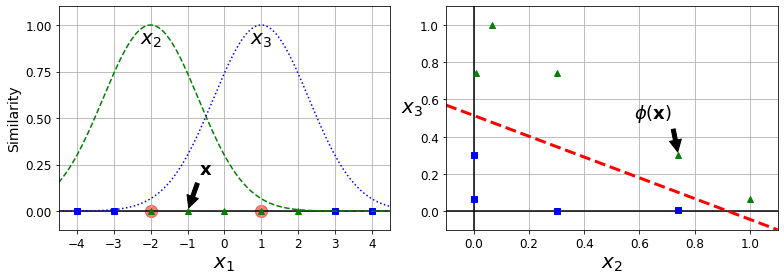

In [28]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

On peut se demander comment sélectionner ces repères. L'approche la plus simple consiste à créer un point de repère à l'emplacement de chaque instance dans l'ensemble de données. Faire ceci crée beaucoup de dimensions et augmente ainsi les chances que le JdE transformé sera séparable linéairement. L'inconvénient est qu'un JdE avec *m* instances et *n* features va être transformé en un JdE de *m* instances et *m* features (en supposant qu'on lâche la feature de départ). Si le JdE est très grand, on finira avec un nombre de features aussi grand.

In [29]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


### Kernel GRBF

Comme pour la méthodes des features polynomiales, la méthode de similarité des features peut être utile avec n'importe quel algo de ML, mais il pourrait être coûteux en cacul de calculer toutes les features additionnelles, particulièrement sur les grands JdE. Encore une fois, le kernel trick fait sa magie SVM, rendant possible d'obtenir un résultat similair comme si on avait ajouté beaucoup de features similaires.

Essayons la classe `SVC` avec le kernel GRBF :

In [30]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C= 0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Ce modèle est représenté en bas à gauche dans la figure suivante. Les autres graphes montrent des modèles entraînés avec différentes valeurs d'hyperparamètre `gamma` ($\gamma$) et `C`.

Augmenter `gamma` rend la courbe en cloche plus étroite (en haut à gauche). Résultat, chaque intervalle d'influence des instances est plus petit : c'est une limite de décision qui finit par être plus irrégulière, tournant autour d'instances individuelles.

À l'inverse, une petite valeur `gamma` rend la courbe en cloche plus large : les instances ont un intervalle d'influence plus large, et la limite de décision sera plus fine. 

Donc $\gamma$ agit comme un hyperparamètre de régularisation : si le modèle overfit, on devrait le réduire; s'il underfit, on devrait l'augmenter (comme pour l'hyperparamètre `C`).

Saving figure moons_rbf_svc_plot


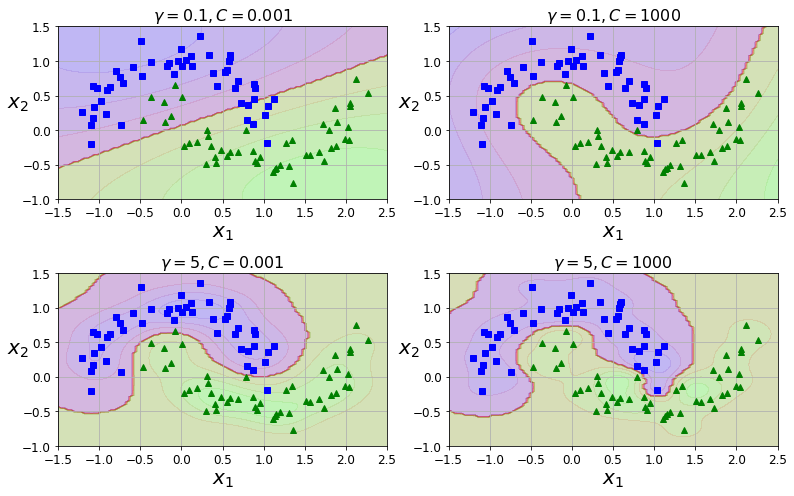

In [31]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

save_fig("moons_rbf_svc_plot")
plt.show()

D'autres kernels existent, mais sont utilisés beaucoup plus rarement. Certains kernels sont spécialisés pour des structures de données spécifiques. Les *string kernels* sont parfois utilisés quand on classifie des document textes ou des **séquences génomiques** (cad en utilisant le *string subsequence kernel* pi des kernels basés sur la *distance de Levenshtein*).

*Conseils* : Avec autant de kernels parmis lesquels choisir, comment décider de celui à utiliser ? En règle générale, on devrait toujours essayer le kernel linéaire (il faut se rappeler que `LinearSVC` est beaucoup plus rapide que `SVC(kernel="linear")`), particulièrement si le JdE est très grand ou s'il a beaucoup de features. Si le JdE n'est pas trop grand, on devrai également essayer le kernel GRBF ; il fonctionne bien dans la plupart des cas. Ensuite, si on a du temps et de la puissance de calcul, on peut expérimenter avec d'autres kernels, en utilisant la *validation croisée* et le *grid search*. Il est recommander d'essayer ce genre d'expérimentation, surtout s'il y a des kernels spécialisés pour les structures de nos JdE.

#### Complexité computationnelle

La classe `LinearSVC` est basée sur la librairie `liblinear`, qui implémente un [algo optimisé](https://www.csie.ntu.edu.tw/~cjlin/papers/cddual.pdf) pour les SVM linéaires. Il ne supporte pas le kernel trick, mais il évolue presque linéairement avec le nombre d'instances de formation et le nombre de fonctionnalités. Sa complexité en temps d'apprentissage est d'environ $O(m*n)$.

L'algo prend plus de temps si on a besoin d'une haute précision. Ceci est contrôlé par l'hyperparamètre de tolérance $\epsilon$ (appelé `tol` sur sklearn). Dans la plupart des tâches de classification, la tolérance est par défaut est bonne.

la classe `SVC` est basée sur la librairie `libsvm` qui implémente un [algo](https://www.microsoft.com/en-us/research/publication/sequential-minimal-optimization-a-fast-algorithm-for-training-support-vector-machines/) qui supporte le kernel trick. La complexité du temps d'entraînement est généralement entre $O(m^2*n)$ et  $O(m^3*n)$. Malheureusement, cela veut dire que cela devient affreusement lent quand le nombre d'instance devient élevé (cad des centaines de milliers d'instances). Cet algorithme est parfait pour les JdE complexes de petite ou moyenne taille. Il s'adapte bien avec le nombre de features, particulièrement les *sparse features* (c'est à dire quand chaque instance à quelques feautres non-nulles). Dans ce cas, l'algo s'adapte grossièrement avec le nombre moyen de features non-nulles par instance. Le tableau ci-dessous compare les classes de classification SVM :

| Classe          |     Complexité en temps | Support OoC | Mise à l'échelle | Kernel trick |
|-----------------|------------------------:|-------------|------------------|--------------|
| `LinearSVC`     | $O(m*n)$                | Non         | Oui              | Non          |
| `SGDClassifier` | $O(m*n)$                | Oui         | Oui              | Non          |
| `SVC`           | $O(m^2*n)$ à $O(m^3*n)$ | Non         | Oui              | Oui          |

### Régression SVM

Comme mentionné précédemment, l'algorithme SVM est polyvalent : non seulement il prend en charge les et la classification non linéaire, mais il prend également en charge la régression linéaire et non linéaire. Pour utiliser les SVM pour la régression au lieu de la classification, l'astuce est d'inverser l'objectif : au lieu d'essayer de faire passer la plus grande rue possible entre deux classes tout en limitant les dépassements de marge, la Régression SVM essaie de faire passer le plus d'instances possibles *sur* la rue tout en limitant les dépassements sur les marges (cad les instances *hors* de la rue). La largeur de la rue est contrôlé par un hyperparamètre, $\epsilon$.

La figure suivante montre deux modèles de Régression SVM linéaires entraînés sur des données linéaires aléatoires, l'un avec grande marge ($\epsilon=1.5$), et l'autre avec une petite marge ($\epsilon=0.5$).

Ajouter plus d'instances d'entraînement au sein de la marge n'affecte pas la prédiction du modèle; ainsi, on dit que le modèle est *sensible à $\epsilon$*.

On peut utiliser la classe sklearn `LinearSVR` pour réaliser la Régression SVM linéaire. Les données d'entraînement doivent être mises à l'échelle et centrée d'abord.

In [32]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [33]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [34]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Saving figure svm_regression_plot


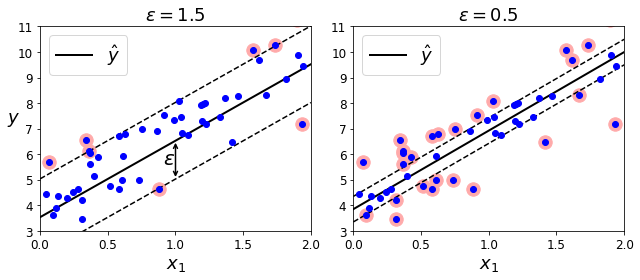

In [35]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

Pour régler le problème des tâches de régression non-linéaires, on peut utiliser un modèle SVM *kernelized*. La figure suivante montre une Régression SVM sur un JdE quadratic, utilisant un kernel de second-degré polynomial. Il y a peu de régularisation dans le graphe de gauche (avec une grande valeur de `C`), et beaucoup plus de régularisation dans le graphe de droite (cad une valeur de `C` faible).

In [36]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

*Remarque* : Pour être résistant aux modifications à l'avenir, on définit `gamma="scale"`, parce que ce sera la valeur par défaut dans sklearn 0.22.

In [37]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [38]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Saving figure svm_with_polynomial_kernel_plot


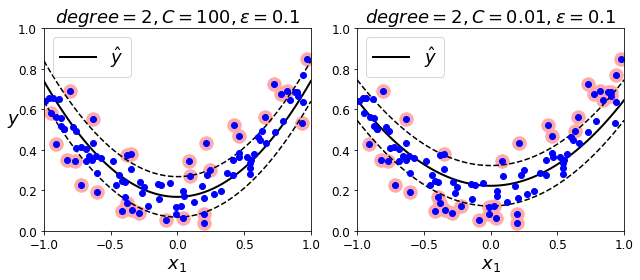

In [39]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

La classe `SVR` est la régression équivalente à la classe `SVC`, et la classe `LinearSVR` est la régression équivalente à la classe `LinearSVC`. la classe `LinearSVR` se met à l'échelle linéairement avec la taille du JdE (tout comme la classe `LinearSVC`), alors que la classe `SVR` devient beaucoup trop lente quand le JdE deveitn trop grand (tout comme la classe `SVC`).

*Remarque* : Les SVM peuvent aussi être utilisés pour la détection d'outliers (cf documentation).

## Under the Hood

Cette section explique comment les SVM font des prédictions et comment leurs algo d'entraînement fonctionnent, en commençant avec les classificateur SVM linéaires. Si on vient juste de commencer avec le ML, on peut sauter cette partie et aller directement aux exercices à la fin du chapitre, et y revenir plus tard quand on aura besoin de comprendre plus en détail les SVM.

D'abord, un mot à propos des notations. Dans les chapitre 4, on a utilisé la convention de mettre tous les paramètres du modèle dans un seul vecteur $\theta$, incluant le terme de biais $\theta_0$ et les poids des caractéristiques d'entrée $\theta_1$ à $\theta_n$, et en ajoutant un biais d'entrée $x_0=1$ à toutes les instances. Dans ce chapitre, on va utiliser une convention qui est plus pratique (et plus courante) quand on s'occupe de SVM : le terme de biais va être appelé $b$, et les vecteurs de poids de features **w**. Aucune feature de biais ne sera ajoutée aux vecteurs de features d'entrée.

### Fonctions de décisions et prédictions

Et donc je complèterai cette partie quand j'aurai besoin de revenir sur les SVM.

## Exercices

1. Quelle est l'idée fondamentale derrière les SVM ?
2. Qu'est-ce qu'un Support Vector ?
3. Pourquoi est-ce important de mettre les entrées à l'échelle quand on utilise une SVM ?
4. Est-ce qu'un classificateur SVM peut sortir un score de confiance quand il classifie une instace ? Qu'en est-il des porbabilités ?
5. Devrait-on utiliser la forme primale ou duale du problème SVM pour entraîner un modèle sur JdE avec millions d'instances d'une centaine de features ?
6. Admettons que nous avons entraîné un classificateur SVM avec un kernel RBF. Il semble qu'il underfit le JdE. Devrait-on augmenter ou diminuer $\gamma$ (`gamma`) ? Qu'en est-il de `C`?
7. Comment devrait-on définir les paramètres QP (H,f, A et b) pour résoudre un classificateur SVM linéaire soft margin en utilisant un solver *off-the-shelf* ?
8. Entrainez un `LinearSVC` sur un dataset linéairement séparable. Ensuite, entrainez un `SVC` et un `SGDClassifier` sur le même dataset. Regarder si on eput faire en sorte qu'ils produisent à peu près le même modèle.
9. Entrainer un classificateur SVM sur le dataset MNIST. Vu que les classificateurs SVM sont des classificateurs binaires, on va devoir utiliser OvR pour classifier les 10 chiffres. On devrait régler les hyperparamètres en utilisant des petits JdV pour accélérer le processus. Quelle précision peut-on atteindre ?
10. Entraîner un régresseur SVM sur le dataset California Housing.